# HW02: Practice with logistic regression and decision tree

[Please put your name and NetID here.]

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

intercept = [-43.55550129], slope = [8.95564464], training score = 0.93
estimated P(Species = virginica | Petal.Length = 5) = [0.7725422]
predicted species (0 = versicolor, 1 = virginica) for petal length of 5 = [1]


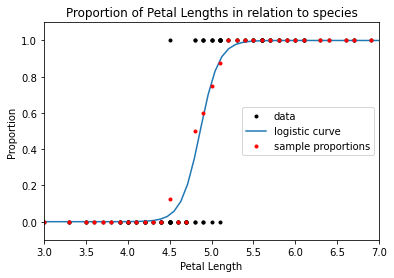

In [2]:

df = pd.read_csv('iris.csv')
df2 = df[['Petal.Length', 'Species']]
df2 = df2[df2.Species != 'setosa']
model = linear_model.LogisticRegression(C=1000)
X = df2[['Petal.Length']].to_numpy()
y = (df2['Species'] == 'virginica').to_numpy().astype(int)
model.fit(X , y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept = {b}, slope = {w}, training score = {model.score(X, y)}')
print(f'estimated P(Species = virginica | Petal.Length = 5) = {model.predict_proba([[5]])[:, 1]}')
print(f'predicted species (0 = versicolor, 1 = virginica) for petal length of 5 = {model.predict([[5]])}')

low = 3
high = 7
plt.plot(X, y, '.', color='black', label='data')
plt.xlim(low, high)
margin = 0.1
plt.ylim(0 - margin, 1 + margin)

plt.title('Proportion of Petal Lengths in relation to species')
plt.xlabel('Petal Length')
plt.ylabel('Proportion')

xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label='logistic curve')

x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]

probs = model.predict_proba(X)[:, 1]
plt.plot(x_values, success_proportion_per_x_value, '.', color='red',
         label='sample proportions')

plt.legend(loc='center right')
plt.show(block=False)


## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and"\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} +
b)}}}{1 - \frac{1}{1 + e^{-(\mathbf{w x} + b)}}}\\
    & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{\frac{1 +
e^{-(\mathbf{w x} + b)}}{1 + e^{-(\mathbf{w x} + b)}} - \frac{1}{1 +
e^{-(\mathbf{w x} + b)}}}\\
    & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} +
b)}}}{\frac{e^{-(\mathbf{w x} + b)}}{1 + e^{-(\mathbf{w x} + b)}}}\\
    & = \ln \frac{1}{e^{-(\mathbf{w x} + b)}}\\
    & = \ln e^{\mathbf{w x} + b}\\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

1:D, 2:C, 3:B, 4:A

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
5         0       3    male   NaN
6         0       1    male  54.0
 before dropNA = (891, 4)
 after dropNA = (714, 4)
 accuracy with max_depth of zero = 0.896
 tree depth = 15
 accuracy with max_depth of two = 0.791


[Text(0.5, 0.8333333333333334, 'Female <= 0.5\nentropy = 0.974\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'Pclass <= 1.5\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.804\nsamples = 261\nvalue = [64, 197]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.314\nsamples = 159\nvalue = [9, 150]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]')]

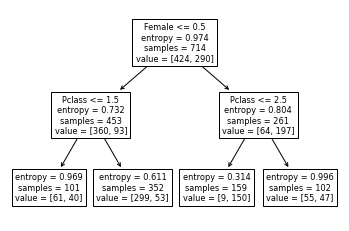

In [3]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age']]
print(df[0:7])
print(f' before dropNA = {df.shape}')
df = df.dropna()
print(f' after dropNA = {df.shape}')
df['Female'] = df.Sex == 'female'

#1st tree (max_depth = 0)
feature_names = ['Pclass', 'Female', 'Age']
X = df[feature_names].to_numpy()
y = df['Survived'].to_numpy()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state=0)
clf.fit(X, y)
print(f' accuracy with max_depth of zero = {round(clf.score(X, y), 3)}')
print(f' tree depth = {clf.tree_.max_depth}')


#2nd tree (max_depth = 2)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state=0)
clf.fit(X, y)
print(f' accuracy with max_depth of two = {round(clf.score(X, y), 3)}')
tree.plot_tree(clf, feature_names=feature_names)

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

Only the Female and Pclass features were utilized in the max_depth = 2 decision-making, which is evident in the tree visual created in the prior question. s

 ## 2c. What proportion of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [4]:
f_survived = round(sum(df.Survived[df.Female == True]) / len(df[df.Female == True]), 3)
print(f'Proportion of female survivability = {f_survived}')
m_survived = round(sum(df.Survived[df.Female == False]) / len(df[df.Female == False]), 3)
print(f'Proportion of male survivability = {m_survived}')

Proportion of female survivability = 0.755
Proportion of male survivability = 0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

In [5]:
# entropy = P(0)* -math.log(P(0), 2) + P(1)* -math.log(P(1),2)
# = 1/2 * -math.log(1/2, 2) + 1/2 * math.log(1/2, 2)
# = 1/2 * -(-1) + 1/2 * -(-1)
# = 1

print(f'entropy S = {1/2 * -math.log(1/2, 2) + 1/2 * - math.log(1/2 , 2)}')

entropy S = 1.0


 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

Considering all 6 splits and calculate H(S−, S+) =|S−|/|S|H(S−) + |S+|/|S| H(S+),
where H(S) = P(0) * -math.log(P(0), 2) + P(1) * -math.log(P(1),2), S- is for
nodes less than the threshold and S+ is for nodes greater.

Case 1: (x1, 2.5): <br>
H(S-) = 0<br>
H(S+) = 1/3 * -math.log(P(1/3), 2) + 2/3 * -math.log(P(2/3), 2)<br>
H(S−, S+) = 3/4 * (1/3 * -math.log(P(1/3), 2) + 2/3 *-math.log(P(2/3), 2)) > 0<br>

Case 2: (x1, 3.5):<br>
H(S-) = 1/2 * -math.log(P(1/2), 2) + 1/2 * -math.log(P(1/2), 2)<br>
H(S+) = 1/2 * -math.log(P(1/2), 2) + 1/2 * -math.log(P(1/2), 2)<br>
H(S−, S+) = 2 * (2/4 * (1/2 * -math.log(P(1/2), 2) + 1/2 *-math.log(P(1/2), 2)) ) > 0<br>

Case 3: (x1, 4.5):<br>
H(S+) = 0<br>
H(S-) = 1/3 * -math.log(P(1/3), 2) + 2/3 * -math.log(P(2/3), 2)<br>
H(S−, S+) = 3/4 * (1/3 * -math.log(P(1/3), 2) + 2/3 *-math.log(P(2/3), 2)) > 0<br>

Case 4: (x2, 6.5):<br>
H(S-) = 0<br>
H(S+) = 1/3 * -math.log(P(1/3), 2) + 2/3 * -math.log(P(2/3), 2)<br>
H(S−, S+) = 3/4 * (1/3 * -math.log(P(1/3), 2) + 2/3 *-math.log(P(2/3), 2)) > 0<br>

Case 5: (x2, 7.5):<br>
H(S+) = 0<br>
H(S-) = 0<br>
H(S−, S+) = 0<br>

Case 6: (x2, 8.5):<br>
H(S+) = 0<br>
H(S-) = 1/3 * -math.log(P(1/3), 2) + 2/3 * -math.log(P(2/3), 2)<br>
H(S−, S+) = 3/4 * (1/3 * -math.log(P(1/3), 2) + 2/3 *-math.log(P(2/3), 2)) > 0<br>


We minimize H(S−, S+) in case 5. Thus we split based off variable x2 with a threshold of 7.5.